# Install Library

In [1]:
!pip install -r requirements.txt

# Load Iris Dataset

In [2]:
from sklearn import datasets

iris = datasets.load_iris()

## Select feature

In [3]:
sepal_length = iris.data[:, 0]
sepal_width  = iris.data[:, 1]
iris_cat = iris.target

## Plot Sepal Width/Sepal Length

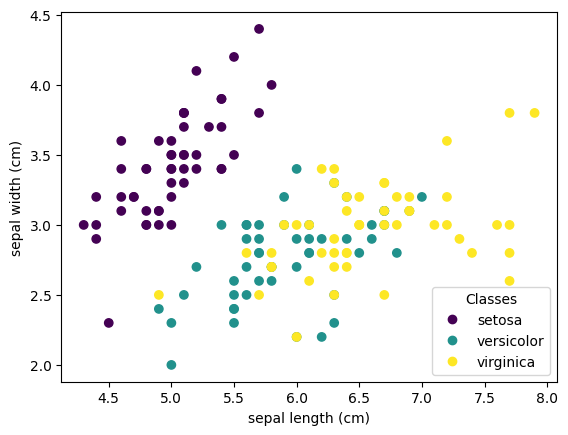

In [4]:
import matplotlib.pyplot as plt

_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

# Build X

In [5]:
import numpy as np

In [6]:
X = np.vstack([sepal_width, sepal_length])
X = X.T
X.shape

(150, 2)

# Build Y

In [7]:
Y = iris_cat
Y.shape

(150,)

# Unsupervised Learning

In [8]:
X.shape

(150, 2)

## KMeans prediction

![SegmentLocal](img/K-means_convergence.gif "segment")

In [9]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(X)
kmeans

KMeans(n_clusters=3, n_init='auto', random_state=0)

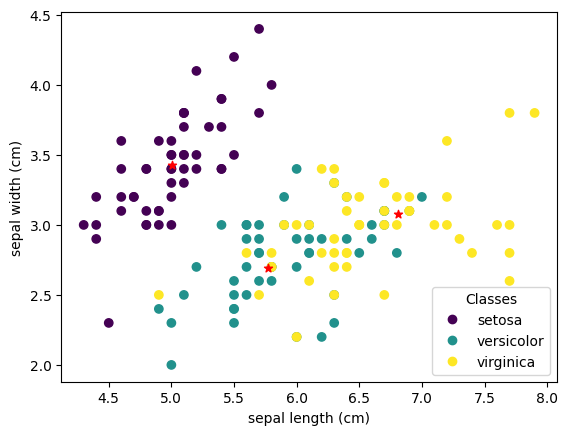

In [10]:
_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])

cluster = kmeans.cluster_centers_
ax.scatter(cluster[:, 1], cluster[:, 0], color='red', marker='*', label='centroid')
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)
plt.show()

# Supervised Learning

## SVC prediction

In [11]:
from sklearn.svm import SVC

svc = SVC(random_state=0)
svc

SVC(random_state=0)

## Split train test

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((100, 2), (50, 2), (100,), (50,))

In [13]:
svc.fit(X_train, y_train)

SVC(random_state=0)

## Performance

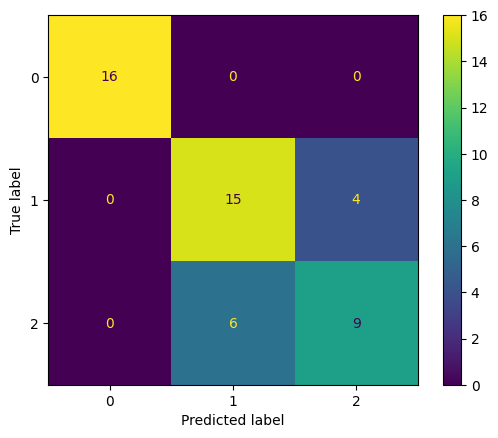

In [14]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(svc, X_test, y_test)

# Deep Learning

## Import keras

In [15]:
# keras imports for the dataset and building our neural network
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation

2024-01-12 18:08:32.027247: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-12 18:08:32.077377: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-12 18:08:32.815074: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## Load mnist dataset

In [16]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

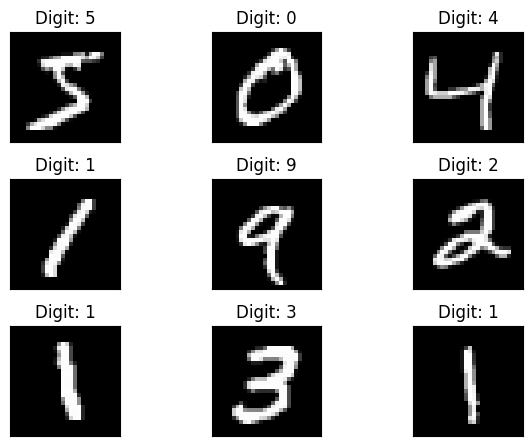

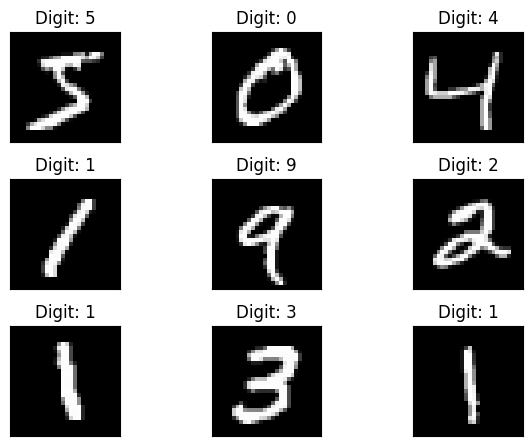

In [17]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
fig

## Reshape X

In [18]:
# let's print the shape before we reshape and normalize
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

# building the input vector from the 28x28 pixels
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalizing the data to help with the training
X_train /= 255
X_test /= 255

# print the final input shape ready for training
print("Train matrix shape", X_train.shape)
print("Test matrix shape", X_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)
Train matrix shape (60000, 784)
Test matrix shape (10000, 784)


## Pre Processing

In [19]:
from keras.utils import to_categorical

In [20]:
# one-hot encoding using keras' numpy-related utilities
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = to_categorical(y_train, n_classes)
Y_test = to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


## Build model

In [21]:
# building a linear stack of layers with the sequential model
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))

2024-01-12 18:08:34.956209: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-12 18:08:35.107835: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [22]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

## Fit model

In [23]:
import os
# training the model and saving metrics in history
history = model.fit(X_train, Y_train,
          batch_size=128, epochs=20,
          verbose=2,
          validation_data=(X_test, Y_test))

# saving the model
save_dir = "./results/"
model_name = 'keras_mnist.h5'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Epoch 1/20
469/469 - 6s - loss: 0.2487 - accuracy: 0.9253 - val_loss: 0.1074 - val_accuracy: 0.9660 - 6s/epoch - 14ms/step
Epoch 2/20
469/469 - 5s - loss: 0.1017 - accuracy: 0.9682 - val_loss: 0.0820 - val_accuracy: 0.9730 - 5s/epoch - 11ms/step
Epoch 3/20
469/469 - 5s - loss: 0.0710 - accuracy: 0.9783 - val_loss: 0.0672 - val_accuracy: 0.9795 - 5s/epoch - 11ms/step
Epoch 4/20
469/469 - 5s - loss: 0.0563 - accuracy: 0.9818 - val_loss: 0.0645 - val_accuracy: 0.9795 - 5s/epoch - 10ms/step
Epoch 5/20
469/469 - 4s - loss: 0.0437 - accuracy: 0.9856 - val_loss: 0.0707 - val_accuracy: 0.9786 - 4s/epoch - 9ms/step
Epoch 6/20
469/469 - 5s - loss: 0.0383 - accuracy: 0.9873 - val_loss: 0.0639 - val_accuracy: 0.9811 - 5s/epoch - 11ms/step
Epoch 7/20
469/469 - 4s - loss: 0.0340 - accuracy: 0.9887 - val_loss: 0.0765 - val_accuracy: 0.9786 - 4s/epoch - 9ms/step
Epoch 8/20
469/469 - 4s - loss: 0.0292 - accuracy: 0.9905 - val_loss: 0.0698 - val_accuracy: 0.9808 - 4s/epoch - 9ms/step
Epoch 9/20
469/469 

/home/chemla/.pyenv/versions/intro_ml/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Model loss

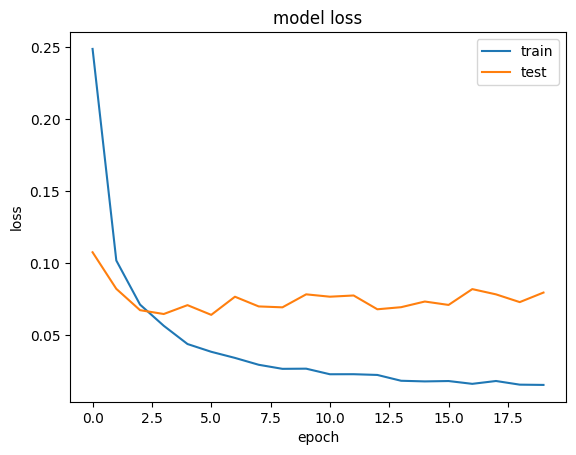

In [24]:
# plotting the metrics
fig = plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

In [25]:
!ls results

keras_mnist.h5


## Evaluate model

In [26]:
mnist_model = load_model("./results/keras_mnist.h5")
loss_and_metrics = mnist_model.evaluate(X_test, Y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

313/313 - 1s - loss: 0.0794 - accuracy: 0.9840 - 1s/epoch - 4ms/step
Test Loss 0.07941507548093796
Test Accuracy 0.984000027179718


313/313 [==============================] - 0s 1ms/step

9840  classified correctly
160  classified incorrectly


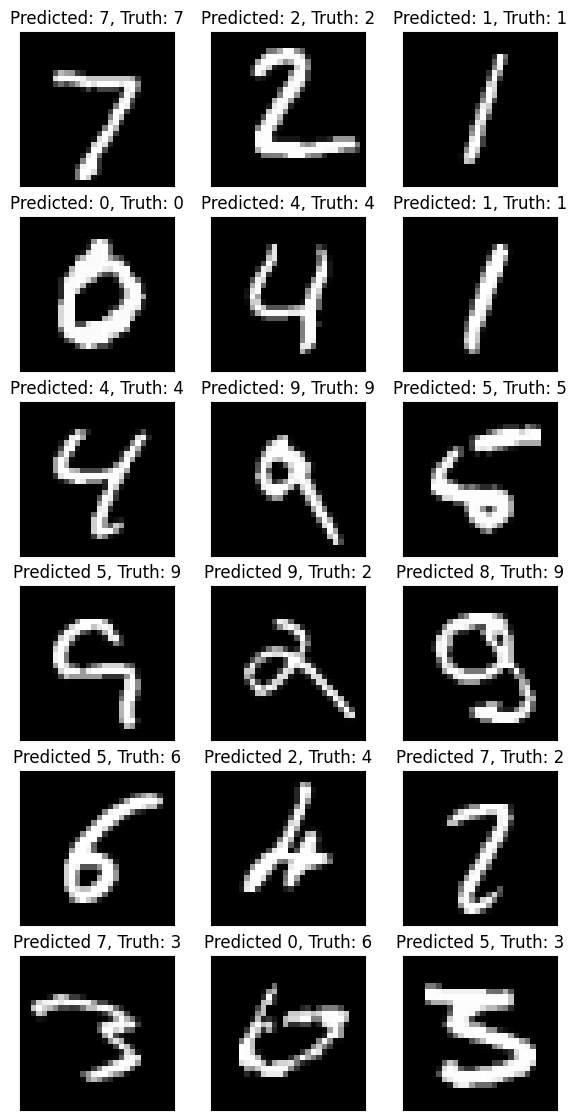

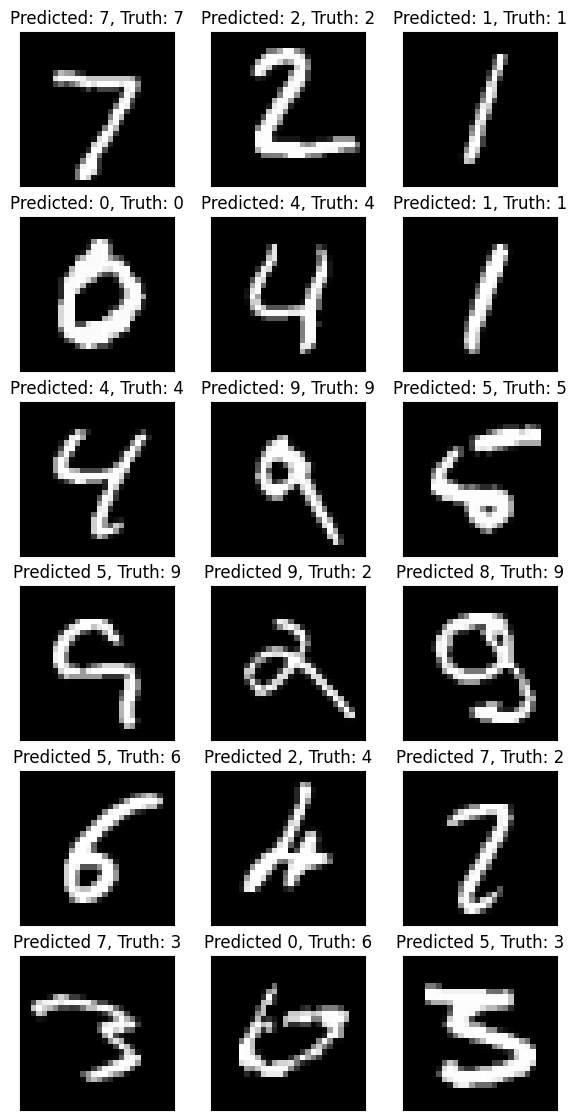

In [33]:
# load the model and create predictions on the test set
mnist_model = load_model("./results/keras_mnist.h5")
predicted_classes = np.argmax(mnist_model.predict(X_test), axis=1)

# see which we predicted correctly and which not
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]
print()
print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")

# adapt figure size to accomodate 18 subplots
plt.rcParams['figure.figsize'] = (7,14)

figure_evaluation = plt.figure()

# plot 9 correct predictions
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(6,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted: {}, Truth: {}".format(predicted_classes[correct],
                                        y_test[correct]))
    plt.xticks([])
    plt.yticks([])

# plot 9 incorrect predictions
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(6,3,i+10)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted {}, Truth: {}".format(predicted_classes[incorrect],
                                       y_test[incorrect]))
    plt.xticks([])
    plt.yticks([])

figure_evaluation